# Data wrangling and Visualization

In [1]:
import wrds
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

------------
## Data Wrangling
### Import data

In [2]:
df=pd.read_csv("Compustat_from_1990.csv")[['fyear', 'tic', 'mv']] # mv is already in million dollars.
df['mv']= df['mv']/1000 # mv is now in billion dollars.
df.head()

,fyear,tic,mv
0,1990,AIR,0.224460
1,1991,AIR,0.204700
2,1992,AIR,0.214663
3,1993,AIR,0.228649
4,1994,AIR,0.243405


In [3]:
tickers= ['AAPL', 'AMZN', 'MSFT', 'TSLA']
df= df[df.tic.isin(tickers)]
df= df[df.fyear>=2000]

### Check data

In [4]:
df.groupby('tic').size()

tic
AAPL    21
AMZN    21
MSFT    21
TSLA    13
dtype: int64

In [5]:
df.head()

,fyear,tic,mv
3525,2000,AAPL,8.643683
3526,2001,AAPL,5.442800
3527,2002,AAPL,5.204905
3528,2003,AAPL,7.598583
3529,2004,AAPL,15.168455


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 3525 to 204420
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fyear   76 non-null     int64  
 1   tic     76 non-null     object 
 2   mv      74 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


### Transform data

In [7]:
df_wide= pd.pivot(df, index= 'fyear', columns='tic', values='mv')
df_wide.head()

tic,AAPL,AMZN,MSFT,TSLA
fyear,,,,
2000,8.643683,5.557991,422.64000,NaN
2001,5.442800,4.038219,392.95900,NaN
2002,5.204905,7.327544,293.13730,NaN
2003,7.598583,21.224487,276.16844,NaN
2004,15.168455,18.146100,310.21872,NaN


In [8]:
df_wide.index= df_wide.index.map(str)

-------------
## Visualizaion

In [9]:
x_ticks= list(map(str,range(2000,2021)))

Text(0.5, 1.0, 'Market cap of \nApple, Amazon, Microsoft, and Tesla')

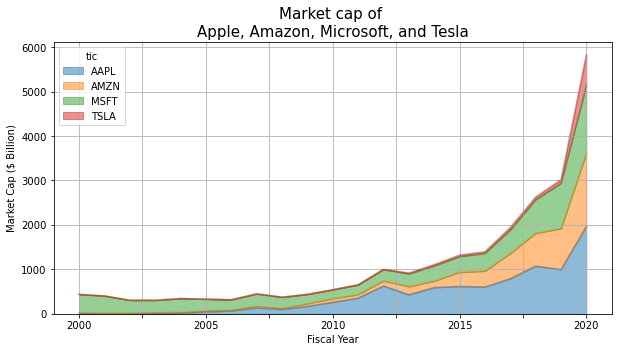

In [10]:
ax= df_wide.plot(kind='area',
            figsize= (10,5),
            alpha=0.5,
            grid=True)
ax.set_xlabel("Fiscal Year")
ax.set_ylabel("Market Cap ($ Billion)")
ax.set_title("Market cap of \nApple, Amazon, Microsoft, and Tesla", fontsize= 15)

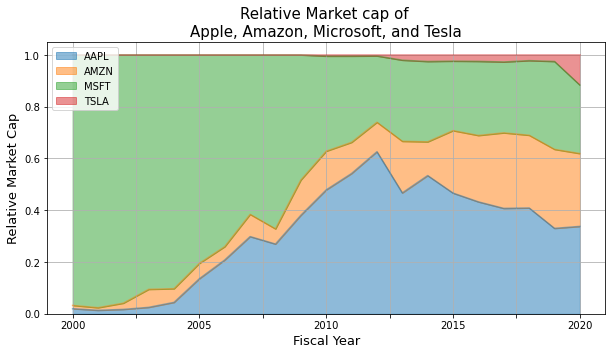

In [11]:
df_wide_normalize= df_wide.div(df_wide.sum(axis=1), axis=0)
ax= df_wide_normalize.plot(kind='area',
            figsize= (10,5),
            alpha=0.5,
            grid=True)
ax.set_xlabel("Fiscal Year", size= 13)
ax.set_ylabel("Relative Market Cap", size= 13)
ax.set_title("Relative Market cap of \nApple, Amazon, Microsoft, and Tesla", fontsize= 15)
ax.legend(loc='upper left')
plt.show()

-----------

## Seaborn's lineplot - PSR trend of selected firms

------------

In [12]:
df=pd.read_csv("Compustat_from_1990.csv")[['fyear', 'tic', 'mv', 'sale']] # mv is already in million dollars.
df= df[df.tic.isin(tickers)]
df= df[df.fyear>=2010]
print(df.shape)
df.head()

(44, 4)


,fyear,tic,mv,sale
3535,2010,AAPL,259906.48750,65225.0
3536,2011,AAPL,354351.90564,108249.0
3537,2012,AAPL,626550.35284,156508.0
3538,2013,AAPL,428699.79775,170910.0
3539,2014,AAPL,591015.72075,182795.0


In [13]:
df['lag_sale']= df.groupby('tic')['sale'].shift(1)
df['psr']= df['mv'] / df['lag_sale']
df.head()

,fyear,tic,mv,sale,lag_sale,psr
3535,2010,AAPL,259906.48750,65225.0,NaN,NaN
3536,2011,AAPL,354351.90564,108249.0,65225.0,5.432762
3537,2012,AAPL,626550.35284,156508.0,108249.0,5.788047
3538,2013,AAPL,428699.79775,170910.0,156508.0,2.739156
3539,2014,AAPL,591015.72075,182795.0,170910.0,3.458052


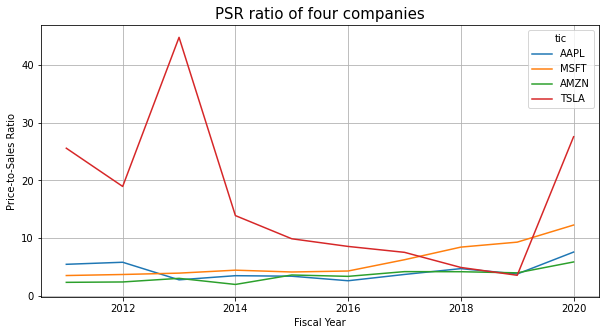

In [14]:
fig, ax= plt.subplots(figsize= (10,5))
ax= sns.lineplot(x=df['fyear'], y=df['psr'], hue= df['tic'])
ax.set_title("PSR ratio of four companies", fontsize= 15)
ax.set_ylabel('Price-to-Sales Ratio')
ax.set_xlabel('Fiscal Year')
ax.grid()

-------------

Due to the extreme PSR values of Tesla, it is hard to see the PSR trend of the other firms.  
Let's exclude Tesla and visualize again.

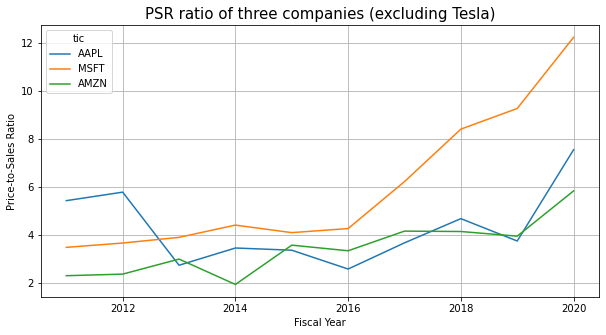

In [15]:
df= df[df.tic!='TSLA']
fig, ax= plt.subplots(figsize= (10,5))
ax= sns.lineplot(x=df['fyear'], y=df['psr'], hue= df['tic'])
ax.set_title("PSR ratio of three companies (excluding Tesla)", fontsize= 15)
ax.set_ylabel('Price-to-Sales Ratio')
ax.set_xlabel('Fiscal Year')
ax.grid()

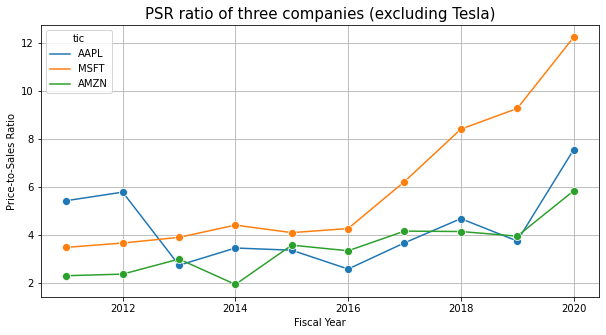

In [16]:
df= df[df.tic!='TSLA']
fig, ax= plt.subplots(figsize= (10,5))
ax= sns.lineplot(x=df['fyear'], y=df['psr'], hue= df['tic'], marker= 'o', markersize=8)
ax.set_title("PSR ratio of three companies (excluding Tesla)", fontsize= 15)
ax.set_ylabel('Price-to-Sales Ratio')
ax.set_xlabel('Fiscal Year')
ax.grid()

-------------

To make the figure easier to read, I remove legend and add text for each line.

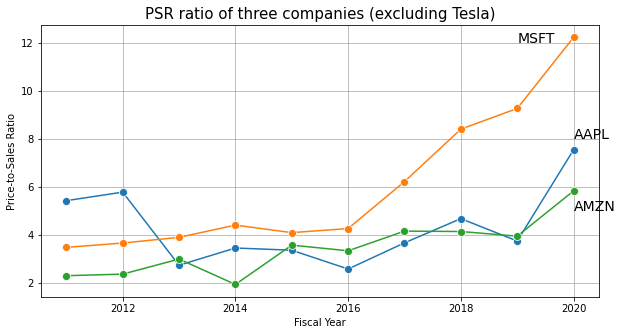

In [17]:
df= df[df.tic!='TSLA']
fig, ax= plt.subplots(figsize= (10,5))
ax= sns.lineplot(x=df['fyear'], y=df['psr'], hue= df['tic'], marker= 'o', markersize=8)
ax.set_title("PSR ratio of three companies (excluding Tesla)", fontsize= 15)
ax.set_ylabel('Price-to-Sales Ratio')
ax.set_xlabel('Fiscal Year')
ax.text(s='MSFT', x= 2019, y= 12, fontsize=14)
ax.text(s='AAPL', x= 2020, y= 8, fontsize=14)
ax.text(s='AMZN', x= 2020, y= 5, fontsize=14)
ax.get_legend().remove()
ax.grid()

-----------

## Seaborn's lineplot - Seaborn with correlation coefficients

------------

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("Compustat_from_1990.csv")[['fyear', 'tic', 'at', 'sale', 'ni', 'ib', 'oancf', 'mv']] # mv is already in million dollars.
df['accr']= df['ni'] - df['oancf']
df= df[df.fyear>=2015]
print(df.shape)
df.head()

(31960, 9)


,fyear,tic,at,sale,ni,ib,oancf,mv,accr
25,2015,AIR,1442.1,1662.6,47.7,40.5,32.1,842.51115,15.6
26,2016,AIR,1504.1,1767.6,56.5,50.2,21.8,1200.32876,34.7
27,2017,AIR,1524.7,1748.3,15.6,73.7,64.3,1551.45804,-48.7
28,2018,AIR,1517.2,2051.8,7.5,84.1,67.4,1046.77092,-59.9
29,2019,AIR,2079.0,2089.3,4.4,24.8,-36.1,707.90649,40.5


In [20]:
vars_list= ['at', 'sale', 'ni', 'ib', 'oancf', 'accr', 'mv']
corr=df[vars_list].corr()
print(f"Correlation matrix:\n\n{corr}")

Correlation matrix:

             at      sale        ni        ib     oancf      accr        mv
at     1.000000  0.830232  0.619124  0.623636  0.848945 -0.683693  0.640971
sale   0.830232  1.000000  0.560522  0.565977  0.789041 -0.649410  0.597281
ni     0.619124  0.560522  1.000000  0.988464  0.750321 -0.180506  0.743273
ib     0.623636  0.565977  0.988464  1.000000  0.758124 -0.202913  0.749772
oancf  0.848945  0.789041  0.750321  0.758124  1.000000 -0.785653  0.803720
accr  -0.683693 -0.649410 -0.180506 -0.202913 -0.785653  1.000000 -0.504570
mv     0.640971  0.597281  0.743273  0.749772  0.803720 -0.504570  1.000000


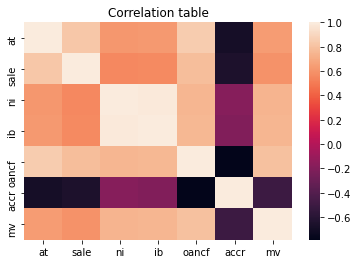

In [21]:
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr)
ax.set_title('Correlation table')
plt.show()

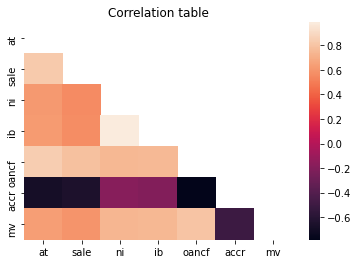

In [22]:
mask = np.triu(np.ones_like(corr, dtype=bool)) # a mask for upper triangle
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr, mask= mask)
ax.set_title('Correlation table')
plt.show()

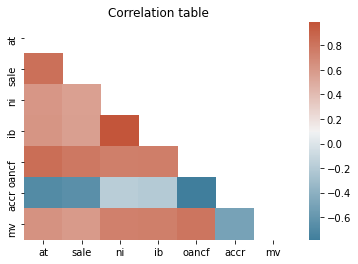

In [23]:
cmap = sns.diverging_palette(230, 20, as_cmap=True) # custom colormap
mask = np.triu(np.ones_like(corr, dtype=bool)) # a mask for upper triangle
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr, mask= mask, cmap= cmap)
ax.set_title('Correlation table')
plt.show()

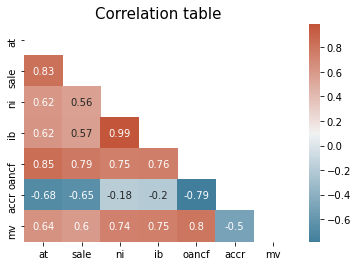

In [24]:
cmap = sns.diverging_palette(230, 20, as_cmap=True) # custom colormap
mask = np.triu(np.ones_like(corr, dtype=bool)) # a mask for upper triangle
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr, mask = mask, cmap=cmap, annot=True) # add annotation
ax.set_title('Correlation table', fontsize= 15)
plt.show()

It's now easy to tell positive correlation coefficients from negative ones!

-----------

## Seaborn's regplot

------------

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv("Compustat_from_1990.csv")[['fyear', 'tic', 'at', 'sale', 'mv']] # mv is already in million dollars.
df= df[df.fyear==2020]
print(df.shape)
df.head()

(5224, 5)


,fyear,tic,at,sale,mv
30,2020,AIR,1539.700,1651.400,1476.90625
218,2020,AAL,62008.000,17337.000,9800.73960
255,2020,CECE,419.314,316.011,246.15432
355,2020,PNW,20020.421,3586.982,9009.40560
416,2020,ABT,72548.000,34608.000,193931.97270


Text(0.5, 1.0, 'Linear relation between asset total (at) and market value (mv)')

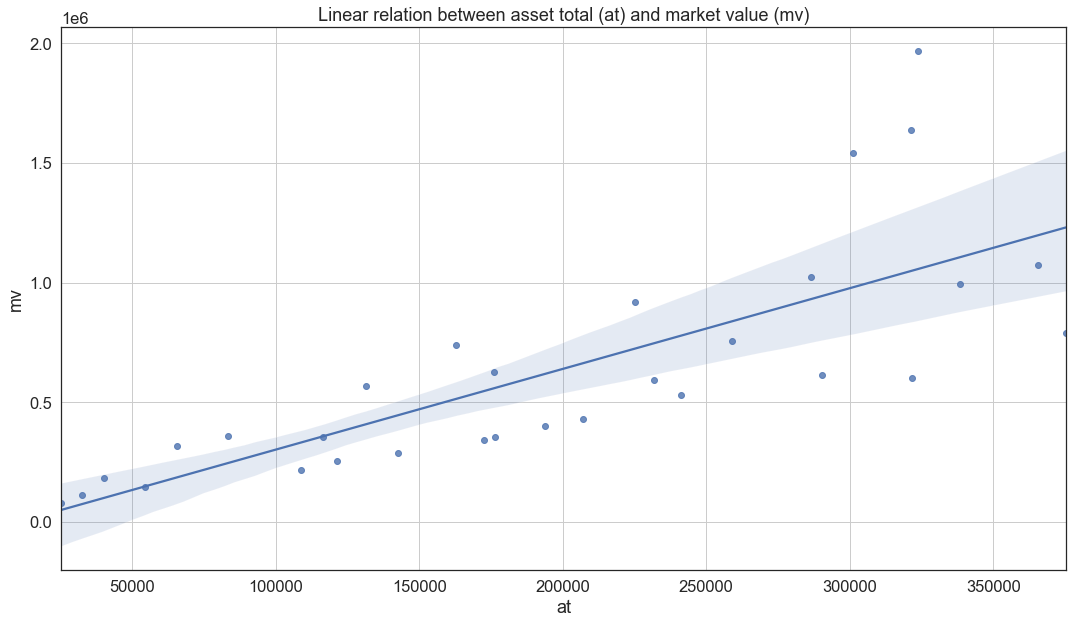

In [72]:
sns.set(font_scale=1.5)
sns.set_style('white')
ax= sns.regplot(data= df, x='at', y= 'mv')
ax.figure.set_size_inches(18, 10)
ax.grid()
ax.set_title("Linear relation between asset total (at) and market value (mv)")

In [40]:
df[df['at']>=100000].shape[0]

24

Text(0.5, 1.0, 'Linear relation between asset total (at) and market value (mv)\n where at >= $100B')

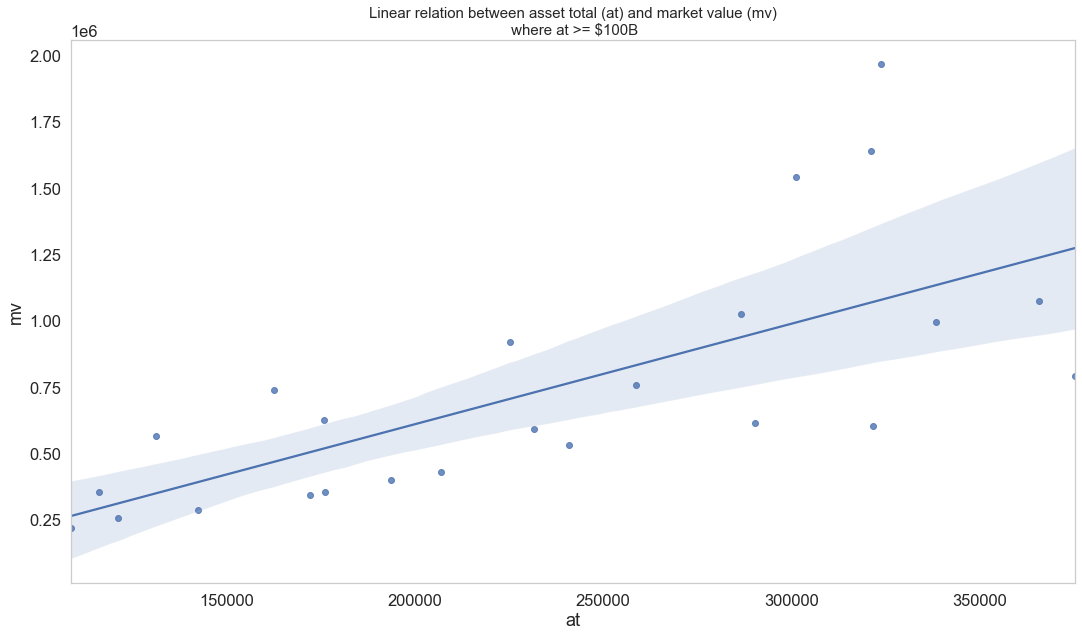

In [45]:
ax= sns.regplot(data= df[df['at']>=100000], x='at', y= 'mv')
ax.figure.set_size_inches(18, 10)
ax.grid()
ax.set_title("Linear relation between asset total (at) and market value (mv)\n where at >= $100B", fontsize= 15)

-----------

## Seaborn's regresion plot - lmplot

------------

In [30]:
df=pd.read_csv("Compustat_from_1990.csv")[['fyear', 'tic', 'at', 'ni', 'mv', 'sale']] # mv is already in million dollars.
tickers= ['AAPL', 'MSFT', 'AMZN']
df= df[df.tic.isin(tickers)]
df= df[df.fyear>=2010]
print(df.shape)
df.head()

(33, 6)


,fyear,tic,at,ni,mv,sale
3535,2010,AAPL,75183.0,14013.0,259906.48750,65225.0
3536,2011,AAPL,116371.0,25922.0,354351.90564,108249.0
3537,2012,AAPL,176064.0,41733.0,626550.35284,156508.0
3538,2013,AAPL,207000.0,37037.0,428699.79775,170910.0
3539,2014,AAPL,231839.0,39510.0,591015.72075,182795.0


In [31]:
df['lag_at']= df.groupby('tic')['at'].shift(1)
df['ROA']= df['ni'] / df['lag_at']
df.head()

,fyear,tic,at,ni,mv,sale,lag_at,ROA
3535,2010,AAPL,75183.0,14013.0,259906.48750,65225.0,NaN,NaN
3536,2011,AAPL,116371.0,25922.0,354351.90564,108249.0,75183.0,0.344785
3537,2012,AAPL,176064.0,41733.0,626550.35284,156508.0,116371.0,0.358620
3538,2013,AAPL,207000.0,37037.0,428699.79775,170910.0,176064.0,0.210361
3539,2014,AAPL,231839.0,39510.0,591015.72075,182795.0,207000.0,0.190870


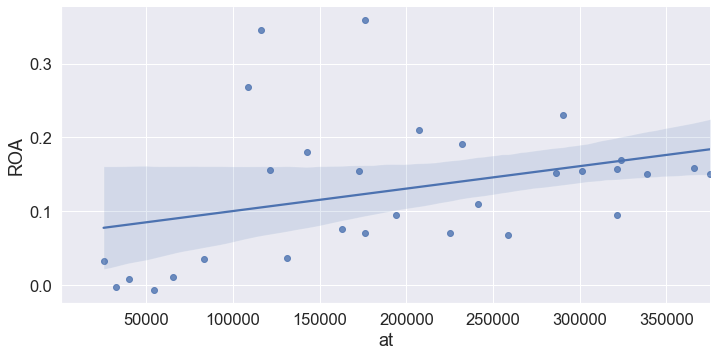

In [32]:
sns.lmplot(x='at', y= 'ROA', data= df, height= 5, aspect= 2)
plt.show()

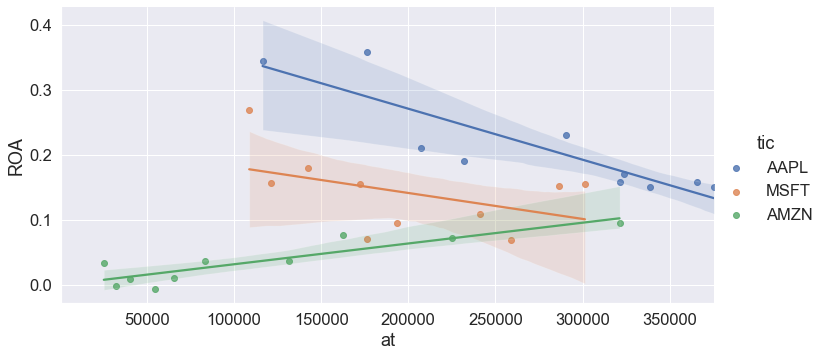

In [33]:
sns.lmplot(x='at', y= 'ROA', data= df, height= 5, aspect= 2, hue= 'tic')
plt.show()

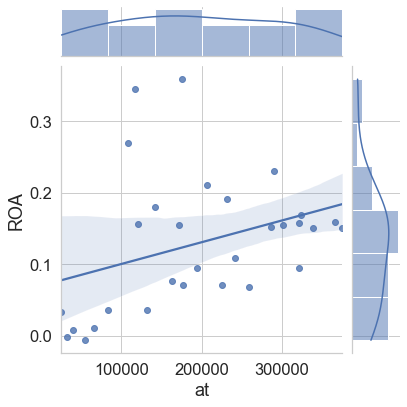

In [48]:
sns.jointplot(x='at', y= 'ROA', data= df, kind='reg')
plt.show()

-----------

## Add regression line

------------

In [35]:
df.head()

,fyear,tic,at,ni,mv,sale,lag_at,ROA
3535,2010,AAPL,75183.0,14013.0,259906.48750,65225.0,NaN,NaN
3536,2011,AAPL,116371.0,25922.0,354351.90564,108249.0,75183.0,0.344785
3537,2012,AAPL,176064.0,41733.0,626550.35284,156508.0,116371.0,0.358620
3538,2013,AAPL,207000.0,37037.0,428699.79775,170910.0,176064.0,0.210361
3539,2014,AAPL,231839.0,39510.0,591015.72075,182795.0,207000.0,0.190870


In [36]:
df.dropna(inplace= True)
x = df['mv']      # year on x-axis
y = df['sale']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

In [37]:
print(fit[0])
print(fit[1])

0.13859033576254032
67935.40680370611


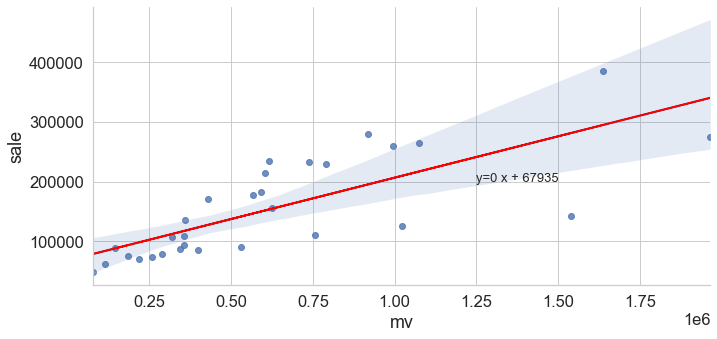

In [43]:
sns.lmplot(x='mv', y= 'sale', data= df, height= 5, aspect= 2)

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy= (1250000, 200000), fontsize=13)
plt.show()